In [ ]:
!pip install networkx[default]
!pip install --upgrade folium

In [ ]:
import pandas as pd

# Replace 'file.csv' with the path to your CSV file
edges_file = 'edges_filtered.xlsx'
stops_file = 'stops.xlsx'

# Read the CSV file into a DataFrame
edges = pd.read_excel(edges_file, header=None)
stops = pd.read_excel(stops_file, header=None)

# Now you can work with the DataFrame 'df'
print(edges.head())  # Display the first few rows of the DataFrame
print(stops.head())

                             0                            1    2
0  Van Cortlandt Park - 242 St                       238 St  210
1                       238 St  Van Cortlandt Park - 242 St   90
2                       238 St                       231 St   90
3                       231 St                       238 St  450
4                       231 St         Marble Hill - 225 St   90
     0                            1          2          3
0  101  Van Cortlandt Park - 242 St  40.889248 -73.898583
1  103                       238 St  40.884667 -73.900870
2  104                       231 St  40.878856 -73.904834
3  106         Marble Hill - 225 St  40.874561 -73.909831
4  107                       215 St  40.869444 -73.915279


In [ ]:
import networkx as nx
G = nx.Graph()

In [ ]:
nodes = stops.iloc[:, 1].tolist()
print(nodes)
G.add_nodes_from(nodes)

['Van Cortlandt Park - 242 St', '238 St', '231 St', 'Marble Hill - 225 St', '215 St', '207 St', 'Dyckman St', '191 St', '181 St', '168 St - Washington Hts', '157 St', '145 St', '137 St - City College', '125 St - Broadway', '116 St - Columbia University', 'Cathedral Pkwy', '103 St', '96 St', '86 St', '79 St', '72 St', '66 St - Lincoln Center', '59 St - Columbus Circle', '50 St', 'Times Sq - 42 St', '34 St - Penn Station', '28 St', '23 St', '18 St', '14 St', 'Christopher St - Sheridan Sq', 'Houston St', 'Canal St', 'Franklin St', 'Chambers St', 'Cortlandt St', 'Rector St', 'South Ferry Loop', 'Wakefield - 241 St', 'Nereid Av', '233 St', '225 St', '219 St', 'Gun Hill Rd', 'Burke Av', 'Allerton Av', 'Pelham Pkwy', 'Bronx Park East', 'E 180 St', 'West Farms Sq - E Tremont Av', '174 St', 'Freeman St', 'Simpson St', 'Intervale Av', 'Prospect Av', 'Jackson Av', '3 Av - 149 St', '149 St - Grand Concourse', '135 St', '125 St - Central Harlem', '116 St', 'Central Park North (110 St)', 'Park Pl', 

In [ ]:
print(edges.iloc[:, :2].values)

[['Van Cortlandt Park - 242 St' '238 St']
 ['238 St' 'Van Cortlandt Park - 242 St']
 ['238 St' '231 St']
 ...
 ['St George' 'New Dorp']
 ['St George' 'Tompkinsville']
 ['St George' 'South Ferry Loop']]


In [ ]:
G.add_weighted_edges_from(edges.iloc[:, :3].values)

In [ ]:
# Load latitude and longitude data from the Excel spreadsheet
df = pd.read_excel('stops.xlsx', usecols=[2, 3], names=['latitude', 'longitude'], header=None)

# Combine latitude and longitude data with node names
node_data = dict(zip(nodes, zip(df['latitude'], df['longitude'])))

# Add latitude and longitude attributes to graph nodes
nx.set_node_attributes(G, node_data, name='coordinates')

In [ ]:
# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Sort nodes by betweenness centrality (highest to lowest)
sorted_nodes = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)

# Print the sorted nodes and their betweenness centrality
for node, centrality in sorted_nodes:
    print(f"Node {node}: Betweenness Centrality = {centrality}")

Node Atlantic Av - Barclays Ctr: Betweenness Centrality = 0.3124574236605379
Node 36 St: Betweenness Centrality = 0.22693588326684655
Node 86 St: Betweenness Centrality = 0.2218042089212828
Node 59 St: Betweenness Centrality = 0.21430962552694965
Node 7 Av: Betweenness Centrality = 0.15935680392709314
Node 125 St - East Harlem: Betweenness Centrality = 0.1591282036378186
Node 145 St: Betweenness Centrality = 0.15444423137861615
Node 59 St - Columbus Circle: Betweenness Centrality = 0.1490583494460516
Node Queens Plaza: Betweenness Centrality = 0.14293931209668143
Node 125 St - West Harlem: Betweenness Centrality = 0.13329091449747008
Node Jackson Hts - Roosevelt Av: Betweenness Centrality = 0.13235352110660367
Node DeKalb Av: Betweenness Centrality = 0.11989774396076679
Node Broadway Jct: Betweenness Centrality = 0.11129899828100978
Node South Ferry Loop: Betweenness Centrality = 0.10964526531808855
Node St George: Betweenness Centrality = 0.10642738479150089
Node Franklin Av: Betweenn

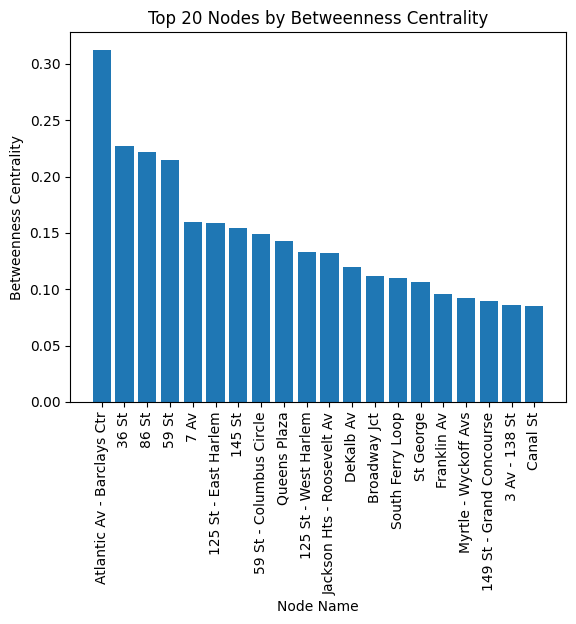

In [ ]:
import matplotlib.pyplot as plt


def plot_centrality(sorted_nodes, betweeness_type):
  # Get the top 20 nodes by betweenness centrality
  top_20_nodes = sorted_nodes[:20]

  # Extract node names and betweenness centrality values
  node_names = [node for node, _ in top_20_nodes]
  centrality_values = [centrality for _, centrality in top_20_nodes]

  # Create a bar chart
  plt.bar(node_names, centrality_values)

  # Set the title and axis labels
  plt.title(f"Top 20 Nodes by {betweeness_type}")
  plt.xlabel("Node Name")
  plt.ylabel(f"{betweeness_type}")

  # Rotate x-axis labels for better readability
  plt.xticks(rotation=90)

  # Display the chart
  plt.show()


plot_centrality(sorted_nodes, "Betweenness Centrality")


Node 59 St: Closeness Centrality = 0.000842615442762178
Node 36 St: Closeness Centrality = 0.0008386996835513067
Node 33 St: Closeness Centrality = 0.0008242534960092212
Node 8 Av: Closeness Centrality = 0.0008229112384922703
Node 14 St: Closeness Centrality = 0.000820452872667446
Node Fort Hamilton Pkwy: Closeness Centrality = 0.0008174269384233797
Node Grand Central - 42 St: Closeness Centrality = 0.000815106350947373
Node 51 St: Closeness Centrality = 0.000811702218795511
Node 40 St: Closeness Centrality = 0.0008071385978362722
Node 28 St: Closeness Centrality = 0.0008033916269210387
Node 46 St: Closeness Centrality = 0.0008021673333756641
Node 23 St: Closeness Centrality = 0.0007987691788905749
Node Steinway St: Closeness Centrality = 0.0007983653522076171
Node 50 St: Closeness Centrality = 0.0007972066216528891
Node Atlantic Av - Barclays Ctr: Closeness Centrality = 0.000796854631848955
Node 25 St: Closeness Centrality = 0.0007967038742090769
Node Times Sq - 42 St: Closeness Centr

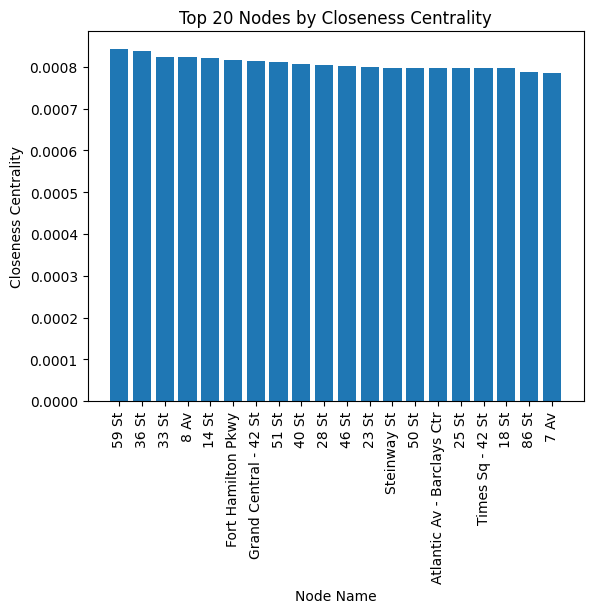

In [ ]:
# Calculate closeness centrality
closeness_centrality = nx.closeness_centrality(G, distance='weight')

# Sort nodes by closeness centrality (highest to lowest)
sorted_nodes = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)

# Print the sorted nodes and their closeness centrality
for node, centrality in sorted_nodes:
    print(f"Node {node}: Closeness Centrality = {centrality}")

plot_centrality(sorted_nodes, "Closeness Centrality")

Node Atlantic Av - Barclays Ctr: Closeness Centrality = 0.17953576504026528
Node 36 St: Closeness Centrality = 0.1775175644028103
Node 59 St: Closeness Centrality = 0.1739329967875172
Node 7 Av: Closeness Centrality = 0.16897012929112795
Node DeKalb Av: Closeness Centrality = 0.16608238387379493
Node Canal St: Closeness Centrality = 0.16463944396177238
Node Grand Central - 42 St: Closeness Centrality = 0.16456795484151107
Node 86 St: Closeness Centrality = 0.16378565254969749
Node Franklin Av: Closeness Centrality = 0.16294067067927773
Node 8 Av: Closeness Centrality = 0.16113945578231292
Node Queens Plaza: Closeness Centrality = 0.16038933559035126
Node Grand St: Closeness Centrality = 0.16005067567567569
Node 59 St - Columbus Circle: Closeness Centrality = 0.15957894736842104
Node Bergen St: Closeness Centrality = 0.1589765100671141
Node 14 St - Union Sq: Closeness Centrality = 0.1582463465553236
Node Lexington Av/59 St: Closeness Centrality = 0.15778517901748543
Node 9 Av: Closeness

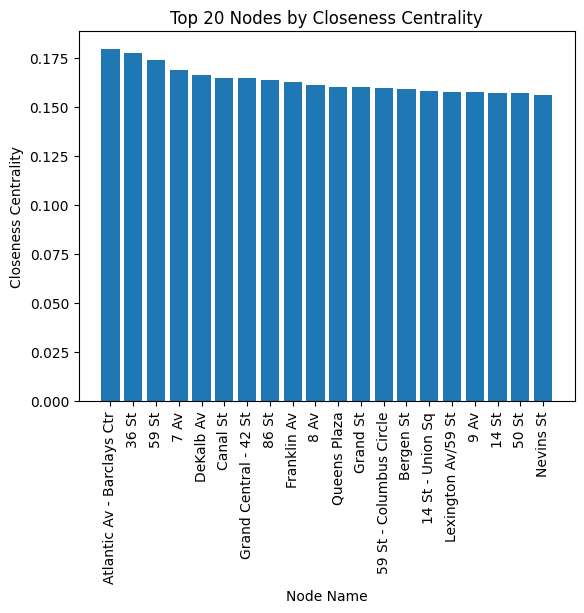

In [ ]:
# Calculate closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Sort nodes by closeness centrality (highest to lowest)
sorted_nodes = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)

# Print the sorted nodes and their closeness centrality
for node, centrality in sorted_nodes:
    print(f"Node {node}: Closeness Centrality = {centrality}")

plot_centrality(sorted_nodes, "Closeness Centrality")

Node Canal St: Degree Centrality = 0.039577836411609495
Node Times Sq - 42 St: Degree Centrality = 0.0316622691292876
Node Atlantic Av - Barclays Ctr: Degree Centrality = 0.029023746701846966
Node Broadway Jct: Degree Centrality = 0.029023746701846966
Node 145 St: Degree Centrality = 0.02638522427440633
Node 14 St: Degree Centrality = 0.02638522427440633
Node Fulton St: Degree Centrality = 0.02638522427440633
Node Franklin Av: Degree Centrality = 0.02638522427440633
Node 59 St: Degree Centrality = 0.02638522427440633
Node 14 St - Union Sq: Degree Centrality = 0.02638522427440633
Node 86 St: Degree Centrality = 0.023746701846965697
Node Grand Central - 42 St: Degree Centrality = 0.023746701846965697
Node 59 St - Columbus Circle: Degree Centrality = 0.021108179419525065
Node Chambers St: Degree Centrality = 0.021108179419525065
Node Church Av: Degree Centrality = 0.021108179419525065
Node Jay St - MetroTech: Degree Centrality = 0.021108179419525065
Node 7 Av: Degree Centrality = 0.021108

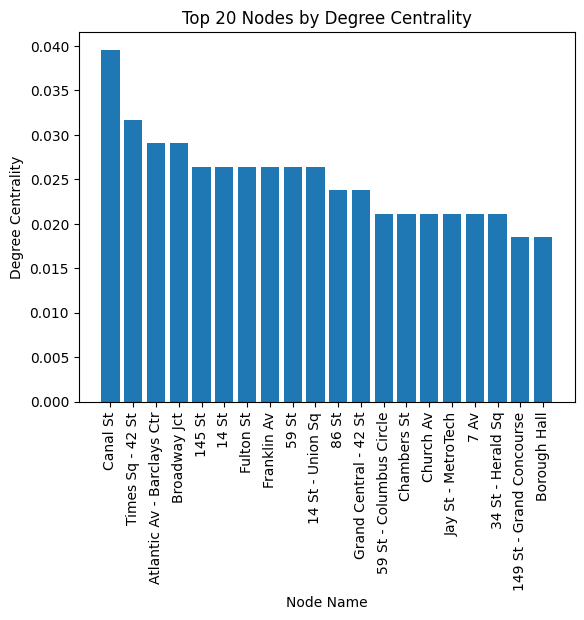

In [ ]:
# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)

# Sort nodes by degree centrality (highest to lowest)
sorted_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)

# Print the sorted nodes and their degree centrality
for node, centrality in sorted_nodes:
    print(f"Node {node}: Degree Centrality = {centrality}")

plot_centrality(sorted_nodes, "Degree Centrality")

Node Canal St: Eigenvector Centrality = 0.4309294727252982
Node 14 St - Union Sq: Eigenvector Centrality = 0.2862243976565977
Node Chambers St: Eigenvector Centrality = 0.25275366198931964
Node Atlantic Av - Barclays Ctr: Eigenvector Centrality = 0.23025610755608905
Node W 4 St: Eigenvector Centrality = 0.22082357498162794
Node 34 St - Herald Sq: Eigenvector Centrality = 0.21715148032446377
Node 14 St: Eigenvector Centrality = 0.21707580628158668
Node Brooklyn Bridge - City Hall: Eigenvector Centrality = 0.19717370205271859
Node Times Sq - 42 St: Eigenvector Centrality = 0.19493433005611585
Node 23 St: Eigenvector Centrality = 0.17750839723194797
Node Fulton St: Eigenvector Centrality = 0.16724879694667072
Node Grand Central - 42 St: Eigenvector Centrality = 0.15817330619019343
Node DeKalb Av: Eigenvector Centrality = 0.15344882665729861
Node World Trade Center: Eigenvector Centrality = 0.14033945940594544
Node 34 St - Penn Station: Eigenvector Centrality = 0.13439270542476342
Node Par

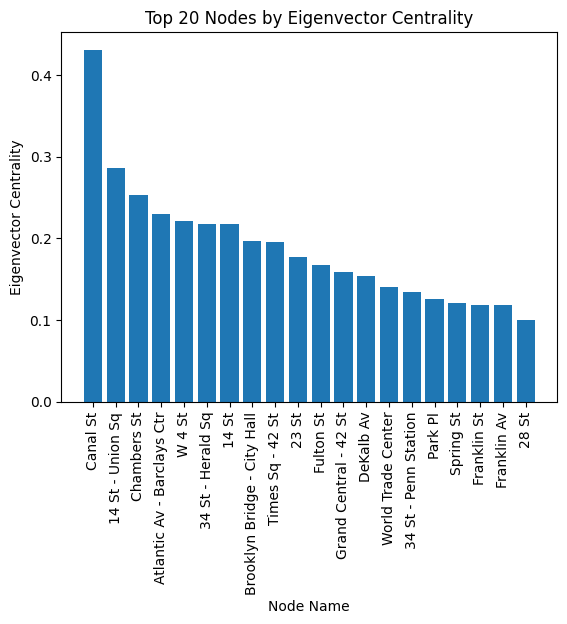

In [ ]:
# Calculate degree centrality
eigenvector_centrality = nx.eigenvector_centrality(G)

# Sort nodes by degree centrality (highest to lowest)
sorted_nodes = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)

# Print the sorted nodes and their degree centrality
for node, centrality in sorted_nodes:
    print(f"Node {node}: Eigenvector Centrality = {centrality}")

plot_centrality(sorted_nodes, "Eigenvector Centrality")

In [ ]:
import folium
import folium.plugins as plugins


# Extract latitude and longitude values from the 'stops' DataFrame
latitudes = stops.iloc[:, 2].tolist()
longitudes = stops.iloc[:, 3].tolist()

# Create a map centered at the mean latitude and longitude of the stops
map_center = [sum(latitudes) / len(latitudes), sum(longitudes) / len(longitudes)]
nyc_map = folium.Map(location=map_center, zoom_start=12)

# Add markers for each stop
for lat, lon, node in zip(latitudes, longitudes, nodes):
    folium.Marker([lat, lon],
                  popup=f"""
          <b>Node:</b> {node}<br>
          <b>Degree Centrality:</b> {degree_centrality[node]:.5f}<br>
          <b>Betweenness Centrality:</b> {betweenness_centrality[node]:.5f}<br>
          <b>Closeness Centrality:</b> {closeness_centrality[node]:.5f}
          """,
          ).add_to(nyc_map)

# Add a layer control to the map
folium.LayerControl().add_to(nyc_map)


# Display the map
nyc_map.save('centrality_map.html')  # Save the map as an HTML file
nyc_map



In [ ]:
import folium
import folium.plugins as plugins

# Extract latitude and longitude values from the 'stops' DataFrame
latitudes = stops.iloc[:, 2].tolist()
longitudes = stops.iloc[:, 3].tolist()

# Create a map centered at the mean latitude and longitude of the stops
map_center = [sum(latitudes) / len(latitudes), sum(longitudes) / len(longitudes)]
nyc_map = folium.Map(location=map_center, zoom_start=12)

# Add markers for each stop
for lat, lon, node in zip(latitudes, longitudes, nodes):
    folium.Marker([lat, lon],
                  popup=f"""
          <b>Node:</b> {node}<br>
          <b>Degree Centrality:</b> {degree_centrality[node]:.5f}<br>
          <b>Betweenness Centrality:</b> {betweenness_centrality[node]:.5f}<br>
          <b>Closeness Centrality:</b> {closeness_centrality[node]:.5f}
          """,
          ).add_to(nyc_map)

# Add a layer control to the map
folium.LayerControl().add_to(nyc_map)

# Save the map to an HTML file
nyc_map.save('NYC_Subway_Map.html')


# Average Distances

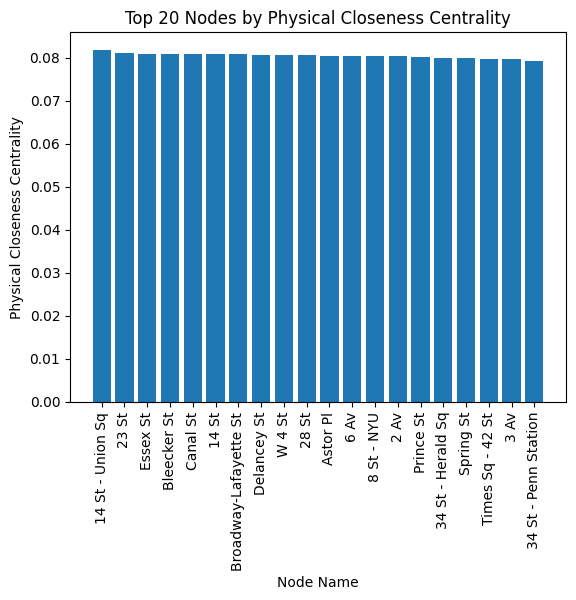

In [ ]:
from geopy.distance import geodesic

# Calculate distances between nodes based on their geographical coordinates
for u, v in G.edges():
    coords_u = G.nodes[u]['coordinates']
    coords_v = G.nodes[v]['coordinates']
    distance = geodesic(coords_u, coords_v).kilometers
    G[u][v]['distance'] = distance

# Calculate closeness centrality weighted by physical distances
closeness = nx.closeness_centrality(G, distance='distance')


# Sort nodes by degree centrality (highest to lowest)
sorted_nodes = sorted(closeness.items(), key=lambda x: x[1], reverse=True)


# Remove the second entry from the sorted_nodes list
sorted_nodes = sorted_nodes[:1] + sorted_nodes[2:]

plot_centrality(sorted_nodes, "Physical Closeness Centrality")


In [ ]:
closeness['Kew Gardens - Union Tpke']

0.04915266667426564

In [ ]:
import folium
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

# Calculate closeness centrality weighted by physical distances
closeness = nx.closeness_centrality(G, distance='distance')

# Sort nodes based on closeness centrality scores
sorted_nodes = sorted(closeness.items(), key=lambda x: x[1], reverse=True)

# Create a map centered around New York City
map_nyc = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

# Normalize closeness centrality values
min_closeness = min(closeness.values())
max_closeness = max(closeness.values())

# Create a ScalarMappable object to map normalized values to colors
norm = plt.Normalize(min_closeness, max_closeness)
cmap = plt.cm.seismic
sm = ScalarMappable(norm=norm, cmap=cmap)

# Add nodes to the map with color based on closeness centrality
for rank, (node, data) in enumerate(sorted_nodes, start=1):
    coords = G.nodes[node]['coordinates']
    closeness_value = closeness[node]
    color = cmap(norm(closeness_value))
    hex_color = cmap(norm(closeness_value), bytes=True)[:3]
    popup_html = f"<b>{node}</b><br>Closeness Centrality: {closeness_value:.4f}<br>Rank: {rank}/{len(sorted_nodes)}"
    folium.CircleMarker(location=coords, radius=5, color='#000000', fill=True, fill_color=('#%02x%02x%02x' % hex_color), fill_opacity=0.7, popup=popup_html).add_to(map_nyc)

# Display the map
map_nyc.save('closeness_centrality_map.html')  # Save the map as an HTML file
map_nyc

In [ ]:
# Save the map as a PNG image
map_nyc.save("map_ny.png")

In [ ]:
import folium
import networkx as nx
from geopy.distance import geodesic
import random

random.seed(387)

original_nodes = list(G.nodes())  # Store the original set of nodes

# Set the initial coordinates and zoom level for the map
map_center = [40.7128, -74.0059]  # Coordinates for New York City
zoom_level = 12

# Create a new map object
map_ny = folium.Map(location=map_center, zoom_start=zoom_level)

# Define the locations and their coordinates
locations = {
    'The Bronx': [40.8448, -73.8648],
    'Times Square': [40.7589, -73.9851],
    'Flatbush': [40.6362, -73.9593],
    'Queens': [40.7282, -73.7949],
    'Harlem': [40.8115, -73.9460]
}

def find_nearest_stop(coords, G):
    min_distance = float('inf')
    nearest_stop = None
    for node, data in G.nodes(data=True):
        if 'coordinates' in data:
            stop_coords = data['coordinates']
            distance = geodesic(coords, stop_coords).kilometers
            if distance < min_distance:
                min_distance = distance
                nearest_stop = node
    return min_distance, nearest_stop


G_copy = G.copy()
# Repeat the process 100 times and compute the average change in distance
average_changes = {name: 0.0 for name in locations}
for _ in range(10):
    removed_nodes = random.sample(original_nodes, 50)
    G.remove_nodes_from(removed_nodes)

    for name, coords in locations.items():
        original_distance, original_stop = find_nearest_stop(coords, G_copy)
        new_distance, new_stop = find_nearest_stop(coords, G)
        change_in_distance = new_distance - original_distance
        average_changes[name] += change_in_distance

    G.add_nodes_from(removed_nodes)  # Restore the removed nodes for the next iteration

# Divide the total change by 10 to get the average
for name in locations:
    average_changes[name] /= 10.0

# Plot points and label with average change in distance and nearest stop
for name, coords in locations.items():
    new_distance, new_stop = find_nearest_stop(coords, G)
    folium.Marker(coords, tooltip=f"{name}: Average change in distance = {average_changes[name]:.2f} km, Nearest stop = {new_stop}").add_to(map_ny)

# Display the map
map_ny